In [1]:
import pandas as pd

import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns


from utils import read_sellers, read_seller_delivery, add_brazil_geometry, plot_performance

In [2]:
df = read_seller_delivery()
df.head()

,order_id,seller_id,shipping_limit_date,zip_code,state,lat,lng,order_purchase_timestamp,delivered_carrier_time,outlier
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,27277,SP,-22.498183,-44.123614,2017-09-13 08:59:02,6 days 09:35:14,0
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,03471,SP,-23.566258,-46.518417,2017-04-26 10:53:06,8 days 03:41:54,0
2,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,14403,SP,-20.548228,-47.395897,2018-08-08 10:00:35,2 days 03:27:25,0
3,00048cc3ae777c65dbb7d2a0634bc1ea,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,14091,SP,-21.189402,-47.792956,2017-05-15 21:42:34,1 days 13:23:21,0
4,00054e8431b9d7675808bcb819fb4a32,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,01026,SP,-23.539495,-46.632844,2017-12-10 11:53:48,1 days 13:14:00,0


In [3]:
df = df[df['outlier'] == 0]
df['total_days'] = df['delivered_carrier_time'].dt.days

### Seller Shipping Time

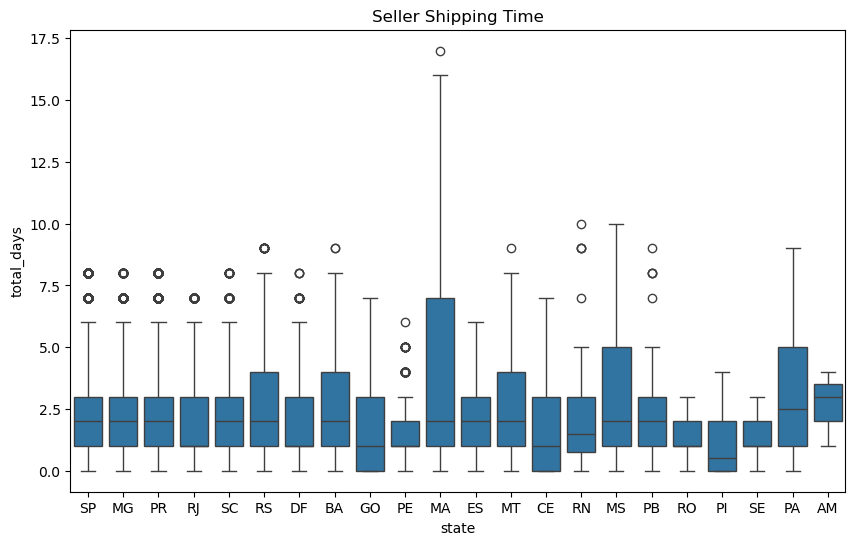

In [4]:
# Create a box plot grouping data by day of the week
fig, ax = plt.subplots(figsize=(10, 6)) #

sns.boxplot(x='state', y='total_days', data=df, ax = ax)
plt.title('Seller Shipping Time')
plt.show()

#### Finding
* Sellers in MA, MS, PA needs to send faster.
* Area to improvement: RS, BA, MT, AM
* Should consider having more carrier partner in those area. if there are alot of sellers in those areas. 

### Total Sellers per State

In [5]:
sellers = read_sellers()
sellers.head()

,seller_id,zip_code,city,state,lat,lng
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.898536,-47.063125
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,-22.382941,-46.946641
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,-22.910641,-43.176510
3,c0f3eea2e14555b6faeea3dd58c1b1c3,04195,sao paulo,SP,-23.657250,-46.610759
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP,-22.971648,-46.533618


In [6]:
sellers = sellers.groupby('state').size().reset_index()
sellers.columns = ['state', 'count']
sellers['density'] = sellers['count'].astype(str).str.len() - 1
sellers = add_brazil_geometry(sellers, 'state')

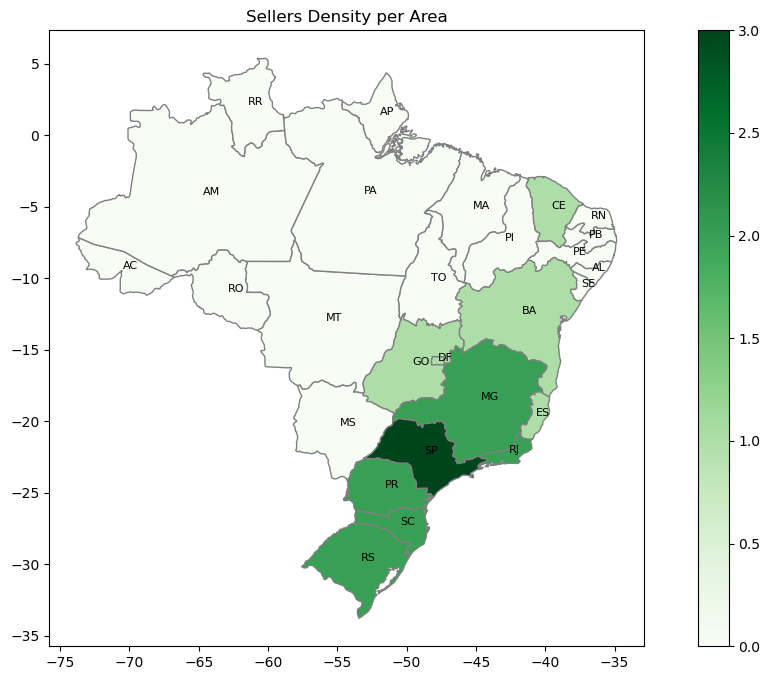

In [7]:
plot_performance(sellers, 'density', 'Sellers Density per Area')

#### Finding
Generally, sellers are located in North_East, South_East, and Southern region.
Customer in Nothern, Central_West region tends to suffer longer delivery time. `further analysis`

Most sellers are located in SP. `priority area`


Area for Imporvement: MG, RJ, PR, SC, RS


### Area That need More Logistic Partners

`RS`

In [8]:
# Get the list of States that the 75 percentile of selling is larger than 3
finding1 = ['MA', 'MS', 'PA', 'RS', 'BA', 'MT', 'AM']
finding2 = ['SP', 'MG', 'RJ', 'PR', 'SC', 'RS']

result = list(set(finding1) & set(finding2))
print(result)

['RS']
